In [1]:
import os
import torch
import sys
import numpy
import matplotlib.pyplot as plt

from torchvision import transforms
import torch.utils.data as Data
from torch.autograd import Variable

sys.path.append('../')

from src.mnist.data import load_mnist
from src.cars.data import DataGenerator, define_filenames
from src.utils.denormalize import denormalize

In [2]:
# Set some hyperparameters
NB_EXAMPLES = 32
DOWNLOAD_MNIST = False
CLASS_SELECTED = [1]
CLASS_CORRUPTED = [0,2,3,4,5,6,7,8,9]
NOISE_PRC = 0.5

PATH_DATA = os.path.join(os.path.expanduser("~"), 'Downloads/mnist')

PATH_DATA_CARS = "/misc/DLshare/home/stepcaro/data/stanford_cars"
PATH_DATA_DOGS = "/misc/DLshare/home/stepcaro/data/stanford_dogs2"

MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

#device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
device = "cpu"

In [3]:
#Load few MNIST examples
_, data = load_mnist(PATH_DATA, download=DOWNLOAD_MNIST)

id_maj = numpy.random.choice(
    numpy.where(numpy.isin(data.test_labels, CLASS_SELECTED))[0],
    int((1 - NOISE_PRC) * NB_EXAMPLES),
    replace=False
)
id_min = numpy.random.choice(
    numpy.where(numpy.isin(data.test_labels, CLASS_CORRUPTED))[0],
    int(NOISE_PRC * NB_EXAMPLES),
    replace=False
)
id = numpy.concatenate((id_maj, id_min))

data.data = data.data[id]
data.targets = data.targets[id]


/home/stepcaro/.conda/envs/memoire/lib/python3.8/site-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [ ]:
#Load few ImageNet examples
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=MEAN, std=STD)])

train_x_files, _, train_y, _ = define_filenames(
    PATH_DATA_DOGS, PATH_DATA_CARS, NB_EXAMPLES,
    NB_EXAMPLES, NOISE_PRC,
    NOISE_PRC)

train_data = DataGenerator(train_x_files,
                           train_y,
                           transform=transform,
                           image_size=(128, 128))

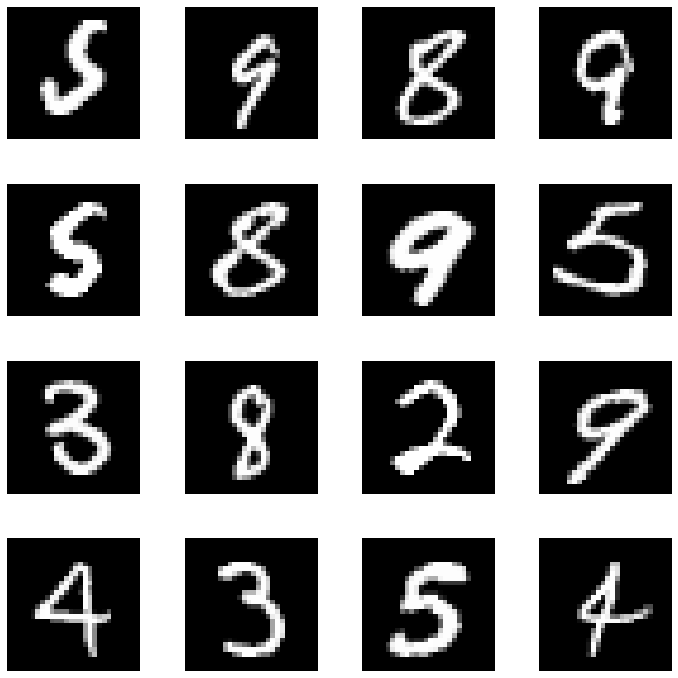

In [4]:
# Show some MNIST examples

plt.rcParams['figure.figsize'] = [10, 10]

fig, axs = plt.subplots(4, 4)
fig.tight_layout()
axs = axs.ravel()

for i in range(16):
        image = data.data[i]
        axs[i].imshow(image, cmap='gray')
        axs[i].axis('off')
        
plt.savefig('mnist-inliers.pdf')

for i in range(16):
        image = data.data[i+16]
        axs[i].imshow(image, cmap='gray')
        axs[i].axis('off')
        
plt.savefig('mnist-outliers.pdf')

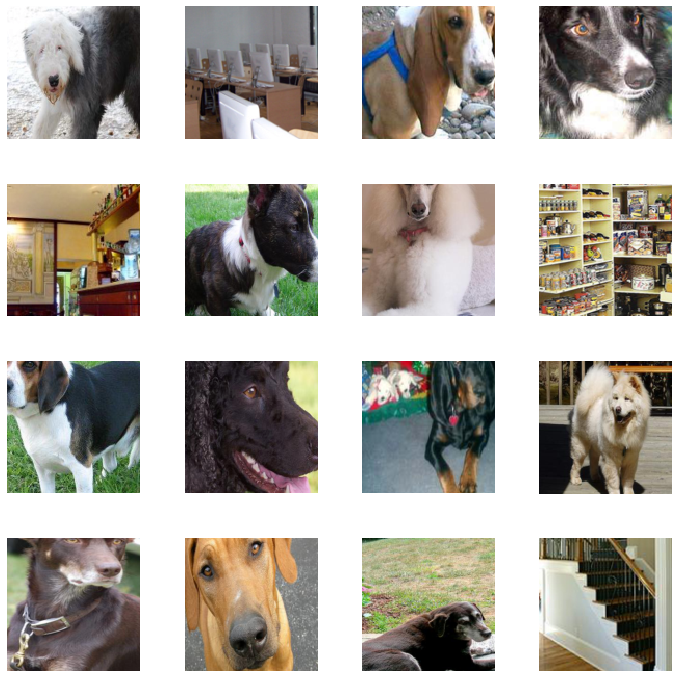

In [15]:
# Show some ImageNet examples

plt.rcParams['figure.figsize'] = [10, 10]

fig, axs = plt.subplots(4, 4)
fig.tight_layout()
axs = axs.ravel()

for i in range(16):
        image = train_data[i][0].transpose_(0,2)
        image = denormalize(image, MEAN, STD, device).numpy().astype(float)
        axs[i].imshow(image)
        axs[i].axis('off')
        
plt.savefig('imagenet-inliers.pdf')

for i in range(16):
        image = train_data[i+16][0].transpose_(0,2)
        image = denormalize(image, MEAN, STD, device).numpy().astype(float)
        axs[i].imshow(image)
        axs[i].axis('off')
        
plt.savefig('imagenet-outliers.pdf')